### **IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import cleaning as cl   
import transforming as tr
import sys
sys.path.append('../model_training/')
from xgb_model import XGBModel

# **DATA UNDERSTANDING**

### **CV'S PATHS**

In [2]:
paths = {
    "pacientes": '../../data/raw_2/pacientes_data.csv',
    "caqueta": '../../data/raw/caqueta_data.csv',
    "narino": '../../data/raw/Narino_data.csv',
    "putumayo": '../../data/raw/Putumayo_data.csv',
    "caqueta_2": '../../data/raw_2/caqueta_data_2.csv',
    "narino_2": '../../data/raw_2/Narino_data_2.csv',
    "putumayo_2": '../../data/raw_2/Putumayo_data_2.csv',
}

### **READ AND NAME CSV'S**

In [3]:
pacientes_df = pd.read_csv(paths["pacientes"], low_memory=False)
caqueta_df = pd.read_csv(paths["caqueta"], low_memory=False)
narino_df = pd.read_csv(paths["narino"], low_memory=False)
putumayo_df = pd.read_csv(paths["putumayo"], low_memory=False)
caqueta_df_2 = pd.read_csv(paths["caqueta_2"], low_memory=False)
narino_df_2 = pd.read_csv(paths["narino_2"], low_memory=False)
putumayo_df_2 = pd.read_csv(paths["putumayo_2"], low_memory=False)

caqueta_df.name = 'caqueta'
pacientes_df.name = 'pacientes'
narino_df.name = 'narino'
putumayo_df.name = 'putumayo'
caqueta_df_2.name = 'caqueta_2'
narino_df_2.name = 'narino_2'
putumayo_df_2.name = 'putumayo_2'

# **BEFORE CLEANING**

### **COLUMNS**

In [4]:
print("caqueta: ", list(caqueta_df_2))
print("narino: ", list(narino_df_2))
print("putumayo: ", list(putumayo_df_2))

caqueta:  ['Año', 'Mes', 'Grupo de Riesgo', 'Programa', 'Evento', 'Afiliados', 'OrigenBD', 'CodDepto', 'DesDepto', 'CodMpio', 'DescMpio', 'Latitud_Y_Mpio', 'Longitud_X_Mpio', 'tipo_usuario', 'Estado', 'FechaNovedadFallecido', 'tipo_identifiCAcion', 'Documento', 'ConCAtenar', 'nombre1', 'nombre2', 'apellido1', 'apellido2', 'FechaNac', 'Edad', 'CiclosV', 'DescrCiclosV', 'QuinQ', 'DescQuinQ', 'Género', 'Cod_Género', 'EnfoqueDif', 'Hecho Victimizante', 'RUV', 'Nivel_Educativo', 'Ocupación', 'Tipo de afiliado', 'Estado_Civil', 'Discapacidad', 'Tipo de Discapacidad', 'Condición de Discapacidad', 'Grado de Discapacidad', 'Pertenencia Étnica', 'MUNICIPIO DONDE VIVE', 'DIRECCIÓN DE DONDE VIVE', 'TELEFONOS DE CONTACTO', 'Zona', 'Cód_poblado', 'Nombre_poblado', 'Latitud_Afiliado', 'Longitud_Afiliado', 'Validación_Dirección_Afiliado', 'CodDepto_IPS', 'DesDepto_IPS', 'CodMpio_IPS', 'DescMpio_IPS', 'CodIPS', 'Nombre_IPS', 'Dirección_IPS', 'Barrio_IPS', 'Teléfono_IPS', 'Latitud_IPS', 'Longitud_IPS', 

In [5]:
def comparable_info(df1, df2):
    fig, axes = plt.subplots(2, 1, figsize=(16, 6))
    fig.suptitle("Missigness comparison")
    print("*************** {} ***************".format(df1.name))
    print(df1.info())
    print(df1.describe(include="all").T)

    msno.matrix(df1, ax=axes[0], sparkline=False)
    axes[0].set_title(("Missing Values Matrix for {}".format(df1.name)))

    print("*************** {} ***************".format(df2.name))
    print(df2.info())
    print(df2.describe(include="all").T)

    msno.matrix(df2, ax=axes[1], sparkline=False)
    axes[1].set_title(("Missing Values Matrix for {}".format(df2.name)))

    plt.show()


### **INFO CAQUETÁ**

*************** caqueta ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Columns: 150 entries, Año to Complicación Renales
dtypes: float64(95), int64(12), object(43)
memory usage: 2.1+ MB
None
                          count unique  \
Año                      1861.0    NaN   
Mes                      1861.0    NaN   
Grupo de Riesgo            1861      1   
Programa                   1861      1   
Evento                     1861      1   
...                         ...    ...   
Complicación Cardiaca       0.0    NaN   
Complicación Cerebral       0.0    NaN   
Complicación Retinianas     0.0    NaN   
Complicación Vascular       0.0    NaN   
Complicación Renales        0.0    NaN   

                                                                       top  \
Año                                                                    NaN   
Mes                                                                    NaN   
Grupo de Riesgo          Po

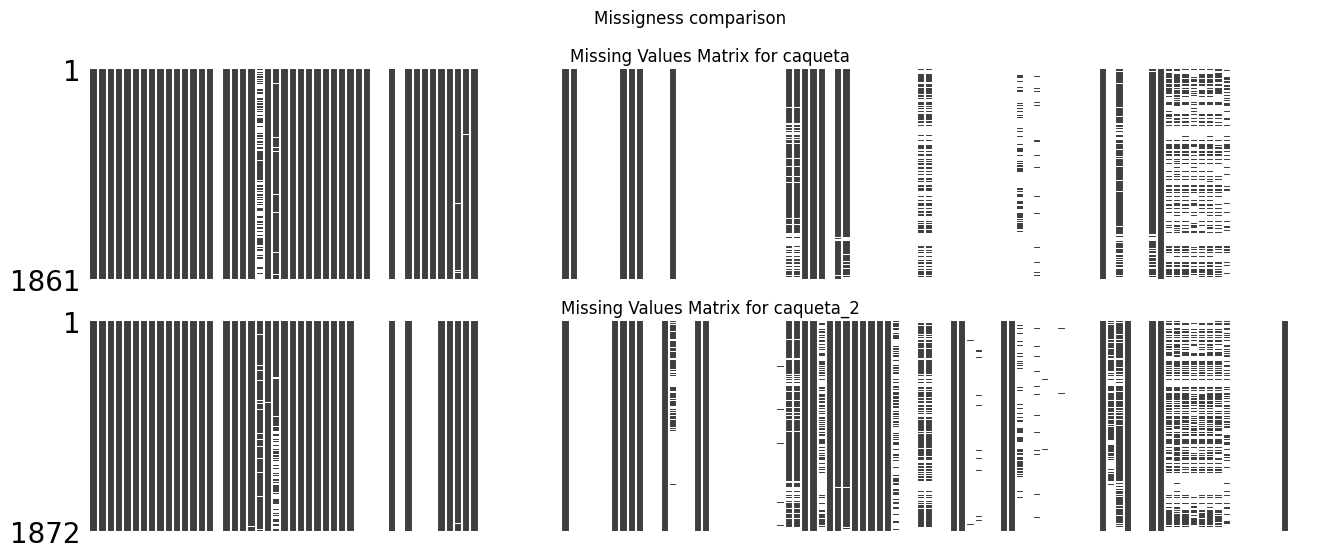

Caquetá 1 missing percentage: 58.070929607737774
Caquetá 2 missing percentage: 50.493945868945865


In [6]:
comparable_info(caqueta_df,caqueta_df_2)
df_missing_percentage = (caqueta_df.isnull().sum().sum() / (caqueta_df.shape[0] * caqueta_df.shape[1])) * 100
print("Caquetá 1 missing percentage: {}".format(df_missing_percentage))
df_missing_percentage = (caqueta_df_2.isnull().sum().sum() / (caqueta_df_2.shape[0] * caqueta_df_2.shape[1])) * 100
print("Caquetá 2 missing percentage: {}".format(df_missing_percentage))

### **INFO NARIÑO**

*************** narino ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4441 entries, 0 to 4440
Columns: 161 entries, Año to REPETIDO
dtypes: float64(44), int64(18), object(99)
memory usage: 5.5+ MB
None
                          count unique  \
Año                      4441.0    NaN   
Mes                      4441.0    NaN   
Grupo de Riesgo            4441      1   
Programa                   4441      1   
Evento                     4441      7   
...                         ...    ...   
Complicación Cerebral      4441      3   
Complicación Retinianas    4441      3   
Complicación Vascular      4441      3   
Complicación Renales       4441      3   
REPETIDO                    0.0    NaN   

                                                                       top  \
Año                                                                    NaN   
Mes                                                                    NaN   
Grupo de Riesgo          Población con r

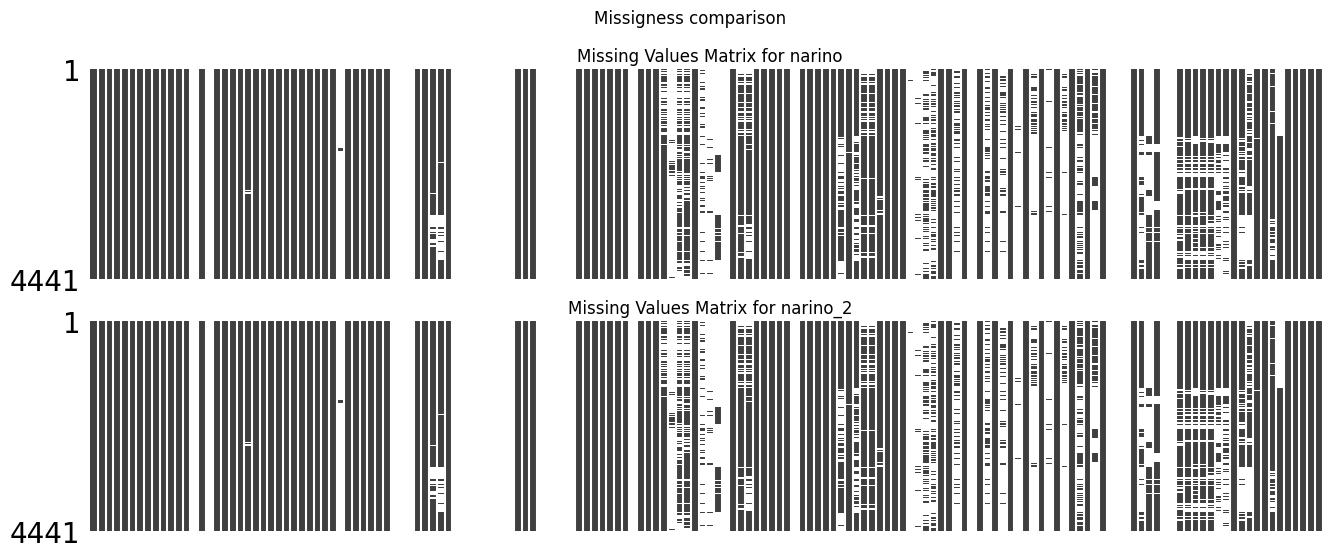

Nariño 1 missing percentage: 30.801635242468194
Nariño 2 missing percentage: 30.801635242468194


In [7]:
comparable_info(narino_df,narino_df_2)
df_missing_percentage = (narino_df.isnull().sum().sum() / (narino_df.shape[0] * narino_df.shape[1])) * 100
print("Nariño 1 missing percentage: {}".format(df_missing_percentage))
df_missing_percentage = (narino_df_2.isnull().sum().sum() / (narino_df_2.shape[0] * narino_df_2.shape[1])) * 100
print("Nariño 2 missing percentage: {}".format(df_missing_percentage))

### **INFO PUTUMAYO**

*************** putumayo ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Columns: 177 entries, Año to OBSERVACIONES
dtypes: float64(39), int64(16), object(122)
memory usage: 1.2+ MB
None
                         count unique  \
Año                      856.0    NaN   
Mes                      856.0    NaN   
Grupo de Riesgo            856      1   
Programa                   856      1   
Evento                     856      5   
...                        ...    ...   
Complicación Cerebral      856      5   
Complicación Retinianas    856      4   
Complicación Vascular      856      3   
Complicación Renales       856      4   
OBSERVACIONES               94     42   

                                                                       top  \
Año                                                                    NaN   
Mes                                                                    NaN   
Grupo de Riesgo          Población con riesgo 

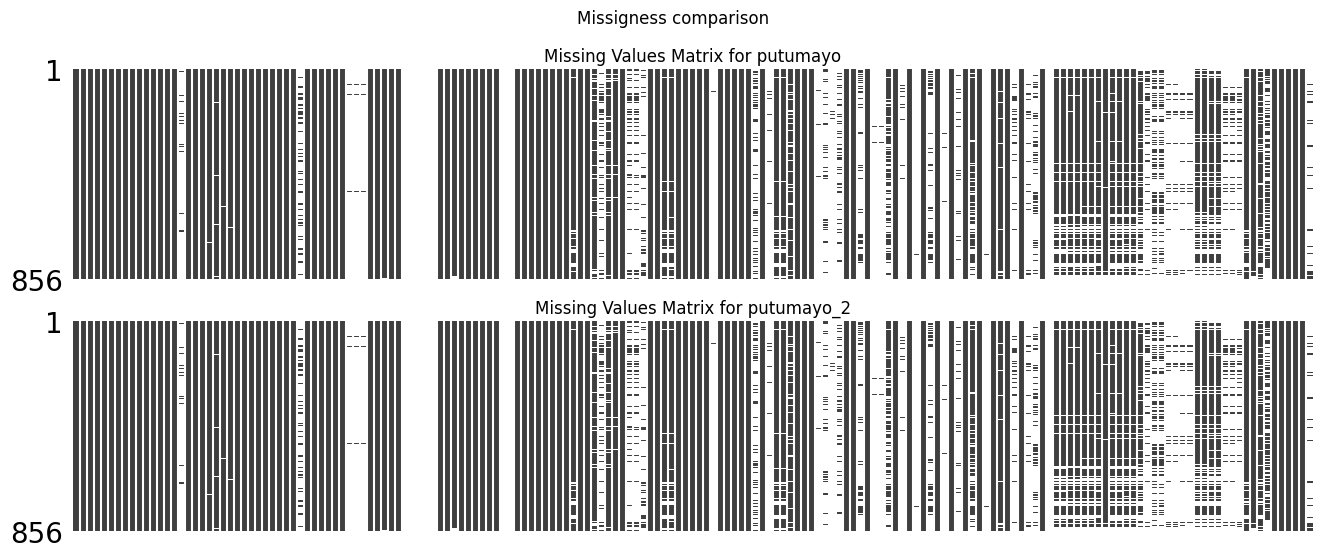

Nariño 1 missing percentage: 26.706135487618145
Nariño 2 missing percentage: 26.70943555625957


In [8]:
comparable_info(putumayo_df,putumayo_df_2)
df_missing_percentage = (putumayo_df.isnull().sum().sum() / (putumayo_df.shape[0] * putumayo_df.shape[1])) * 100
print("Nariño 1 missing percentage: {}".format(df_missing_percentage))
df_missing_percentage = (putumayo_df_2.isnull().sum().sum() / (putumayo_df_2.shape[0] * putumayo_df_2.shape[1])) * 100
print("Nariño 2 missing percentage: {}".format(df_missing_percentage))


### **INFO PACIENTS**

*************** pacientes ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65819 entries, 0 to 65818
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID Afiliado               65819 non-null  object 
 1   Región                    65819 non-null  object 
 2   UT                        65819 non-null  object 
 3   Primer Nombre             65819 non-null  object 
 4   Segundo Nombre            53684 non-null  object 
 5   Primer Apellido           65819 non-null  object 
 6   Segundo Apellido          63451 non-null  object 
 7   Tipo de Documento         65819 non-null  object 
 8   Número de Documento       65819 non-null  int64  
 9   Celular                   26129 non-null  object 
 10  Correo                    8197 non-null   object 
 11  Sexo                      65819 non-null  object 
 12  Fecha de Afiliación       65819 non-null  object 
 13  Fecha Nacimiento   

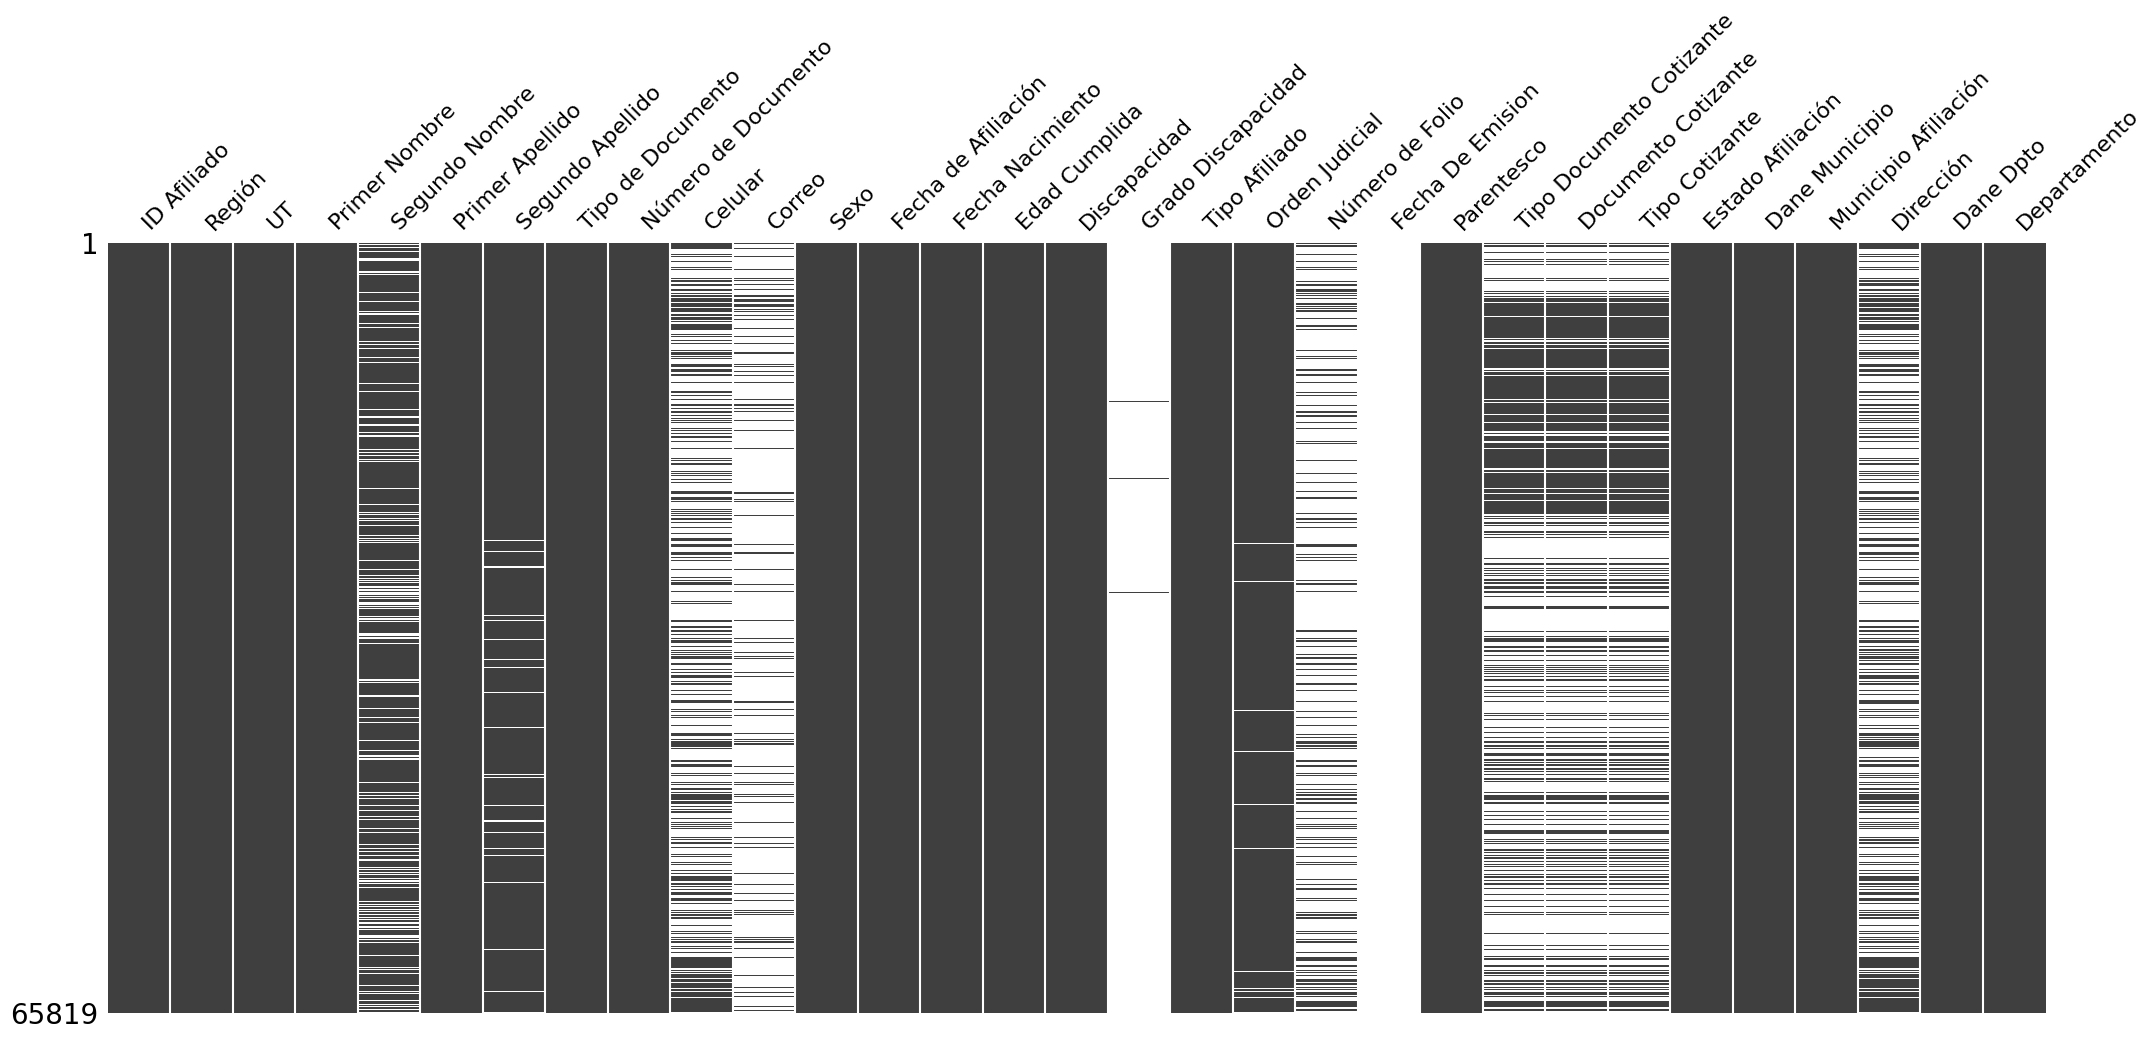

In [9]:
msno.matrix(pacientes_df, sparkline=False)
print("*************** {} ***************".format(pacientes_df.name))
print(pacientes_df.info())
print(pacientes_df.describe(include="all").T)

# **Data Preparation**

### **DATA PREPARATION SETUP**

In [10]:
saving_paths = {
    "transformed_data": '../../data/processed/transformed_data',
    "clean_data": '../../data/processed/cleaned_data/Cleaned_data.csv'
}

cl = cl.Cleaning(saving_paths["clean_data"])
tr = tr.Transform(saving_paths["clean_data"], saving_paths["transformed_data"])

Number of drops defined:
common_drops len: 95
narino_putumayo_drops len: 10
narino_drops len: 1
putumayo_drops len: 15
total drops: 121


In [11]:
cl.run()
unified_df = cl.get_unified_df()
unified_df = unified_df.replace({'NAN': np.nan})
unified_df.name = 'unified df'
df_clean = cl.get_df_clean()
df_clean = df_clean.replace({'NAN': np.nan})
df_clean.name = 'clean df'

------------------------------------------------
Cleaning...
Unique values in column:
**['NO APLICA' 'LOSARTAN' 'SACUBITRILO+VVALSARTAN' 'ATORVASTATINA'
 'CLORTALIDONA' 'METOPROLOL' 'VALSARTAN' 'FUROSEMIDA+ESPIRONOLACTONA'
 'ROSUVASTATINA' 'ASA+CLOPIDOGREL' 'ESPIRINOLACTINA+CARVEDILOL'
 'LOSARTAN+METOPROLOL' 'VIDALGLIPTINA' 'IBERSERTAN+AMLOD'
 'LOSARTAN+CARVEDILLOL+ASA+HTZA+CLOPIDROGEL' 'ENALAPRIL+MALEATO' 'ASA'
 'SITAGLIPTINA' 'GLIMEPERIDINA+VIDALGLIPTINA+ROSUVASTATINA+METFORMINA'
 'GEMFIBROZILO' 'LEVOTIROXINA' 'LOSARTAN+METFORMINA' 'IBERSARTAN+HCT'
 'METFORMINA+VIDALGLIPTINA' 'ENELAPRIL' 'LOSARTAN ASA ROSUV' 'QUINAPRIL'
 'ENALAPRIL' 'AMLODIPINO' 'LOSARTAN+HCT' 'LOSARTAN+AMLODIPINO'
 'EXFORGE+VALSARTAN' 'LOSARTAN+HIDROCLOROTIAZIDA' 'FLOXETINA'
 'LOSARTAN+LEVOTIROXINA+ATORVASTATINA+MTOPROLOL' 'OTORVASTATINA'
 'GENFIBROZILO+ATROVASTATINA+EZOMEPRAZOL'
 'AMLODIPINO+LOSARAN.+HIDROCLOROTIAZIDA+CLONIDINA' 'LANSOPRAZOL'
 'CARDERIDOL' 'AMLODIPINO+HCT' 'CARVEDILOL' 'BETA BLOQUEDOR' 'VERAPAMILO'

In [12]:
def describe_df(df):
    if any(df.dtypes.isin([int, float])):
        numerical_cols = df.select_dtypes(include=['float64', 'int64'])
        numerical_desc = numerical_cols.describe()
        
        print("Numerical Columns Description:")
        print(numerical_desc)

    if any(df.dtypes.isin([object])):
        categorical_cols = df.select_dtypes(include='object')
        categorical = categorical_cols.describe()

        print("Categorical Columns Description:")
        print(categorical)

### **UNIFIED DATA DRAME**

unified_df missing percentage: 35.2228038362051
*************** unified df ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7169 entries, 0 to 7168
Data columns (total 57 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Grupo de Riesgo                                                     7169 non-null   object 
 1   CodDepto                                                            7169 non-null   int64  
 2   FechaNovedadFallecido                                               43 non-null     object 
 3   Edad                                                                7169 non-null   object 
 4   Cod_Género                                                          7169 non-null   int64  
 5   Tipo de Discapacidad                                                20 non-null     object 
 6   Condición de Discapac

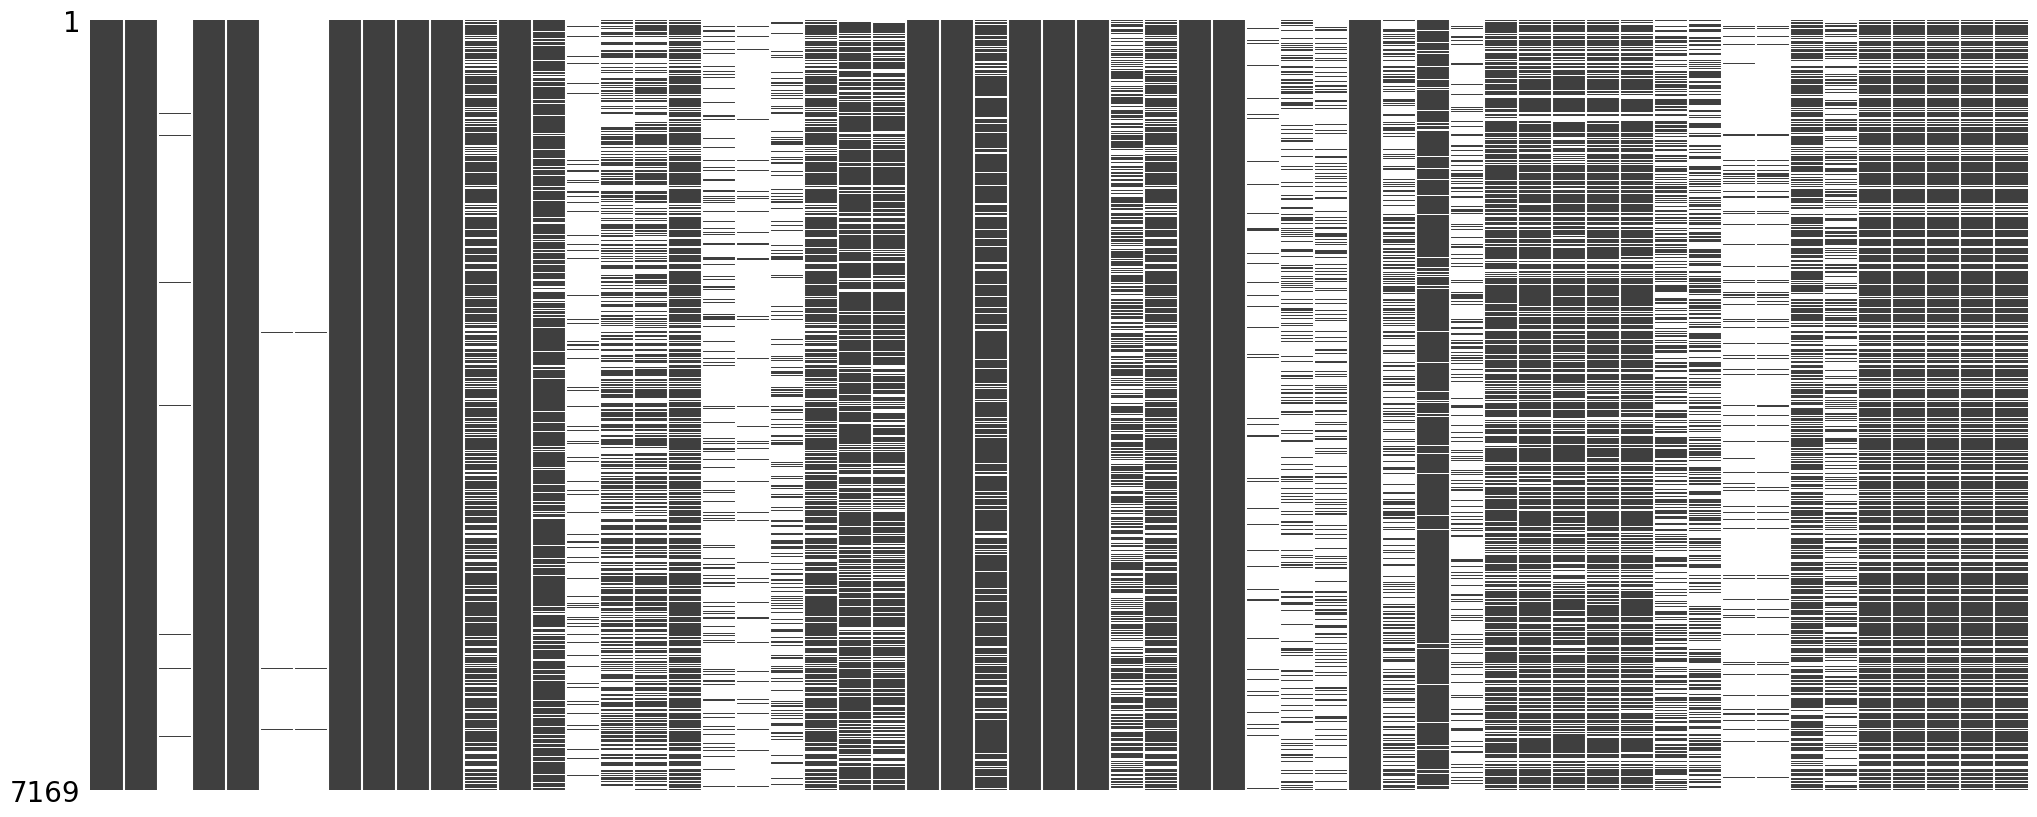

In [13]:
df_missing_percentage = (unified_df.isnull().sum().sum() / (unified_df.shape[0] * unified_df.shape[1])) * 100
print("unified_df missing percentage: {}".format(df_missing_percentage))

msno.matrix(unified_df, sparkline=False)
print("*************** {} ***************".format(unified_df.name))
print(unified_df.info())
print(describe_df(unified_df))

### **Colums before fixing**

In [14]:
def print_col_info(df,columns):
    for col in columns:
        pd.set_option('display.max_rows', None)
        print("\n********************************************************************************")
        print("Column: {}".format(col))
        print("Unique values in {} column:".format(col))
        print(df[col].unique())
        print("Total Unique values:")
        print(len(df[col].unique()))
        print("Value counts for {} column:".format(col))
        print(df[col].value_counts())
        print("Data type of {} column:".format(col))
        print(df[col].dtype)
        print("********************************************************************************")

#['Grupo de Riesgo', 'CodDepto', 'FechaNovedadFallecido', 'Edad', 'Género', 'Cod_Género', 'Tipo de Discapacidad', 'Condición de Discapacidad', 'Pertenencia Étnica', 'Coomorbilidad', 'ADHERENCIA AL TRATAMIENTO', 'Fumador Activo', 'CONSUMO DE ALCOHOL', 'ENTREGA DE MEDICAMENTO OPORTUNA ', 'FARMACOS ANTIHIPERTENSIVOS', 'OTROS FARMACOS ANTIHIPERTENSIVOS', 'RECIBE IECA', 'RECIBE ARA II', 'ESTATINA', 'ANTIDIABETICOS', 'OTROS ANTIDIABETICOS', 'OTROS TRATAMIENTOS', 'OTROS DIAGNÓSTICOS', 'PESO', 'TALLA', 'IMC', 'OBESIDAD', 'CALCULO DE RIESGO DE Framingham (% a 10 años)', 'Clasificación de RCV Global', 'DX CONFIRMADO DE HIPERTENSIÓN ARTERIAL', 'CÓD_DIABETES', 'CLASIFICACION DIABETES', 'DIAGNÓSTICO DISLIPIDEMIAS', 'ANTECEDENTE FAMILIAR  DE ENFERMEDAD CARDIOVASCULAR', 'CÓD_ANTEDECENTE', 'PRESION ARTERIAL', 'COLESTEROL ALTO', 'HDL ALTO', 'CLASIFICACIÓN DE RIESGO CARDIOVASCULAR', 'CALCULO TFG ', 'CLASIFICACIÓN ESTADIO ', 'CREATININA SÉRICA (HOMBRES > 1.7 MG/DL - MUJERES > 1.4 MG/DL) _DIC', 'GLICEMIA 100 MG/DL_DIC', 'COLESTEROL TOTAL > 200 MG/DL_DIC', 'LDL > 130 MG/DL_DIC', 'HDL HOMBRE - 40 MG/DL Y HDL MUJER - 50 MG/DL_DIC', 'TGD > 150 MG/DL_DIC', 'ALBUMINURIA/CREATINURIA', 'HEMOGLOBINA GLICOSILADA > DE 7%', 'HEMOGRAMA', 'POTASIO', 'MICROALBINURIA', 'CREATINURIA', 'UROANALIS', 'PERIMETRO ABDOMINAL', 'Complicación Cardiaca', 'Complicación Cerebral', 'Complicación Retinianas', 'Complicación Vascular', 'Complicación Renales']
print_col_info(unified_df,  list(unified_df))


********************************************************************************
Column: Grupo de Riesgo
Unique values in Grupo de Riesgo column:
['Población con riesgo o alteraciones cardio – cerebro – vascular – metabólicas manifiestas']
Total Unique values:
1
Value counts for Grupo de Riesgo column:
Población con riesgo o alteraciones cardio – cerebro – vascular – metabólicas manifiestas    7169
Name: Grupo de Riesgo, dtype: int64
Data type of Grupo de Riesgo column:
object
********************************************************************************

********************************************************************************
Column: CodDepto
Unique values in CodDepto column:
[52 18 86]
Total Unique values:
3
Value counts for CodDepto column:
52    4441
18    1872
86     856
Name: CodDepto, dtype: int64
Data type of CodDepto column:
int64
********************************************************************************

*******************************************************

### **CLEAN DATA DRAME**

df_clean missing percentage: 25.76150237499174
*************** clean df ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7169 entries, 0 to 7168
Data columns (total 57 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Grupo de Riesgo                                                     7169 non-null   object
 1   CodDepto                                                            7169 non-null   object
 2   FechaNovedadFallecido                                               7169 non-null   object
 3   Edad                                                                7168 non-null   object
 4   Cod_Género                                                          7169 non-null   object
 5   Tipo de Discapacidad                                                7169 non-null   object
 6   Condición de Discapacidad       

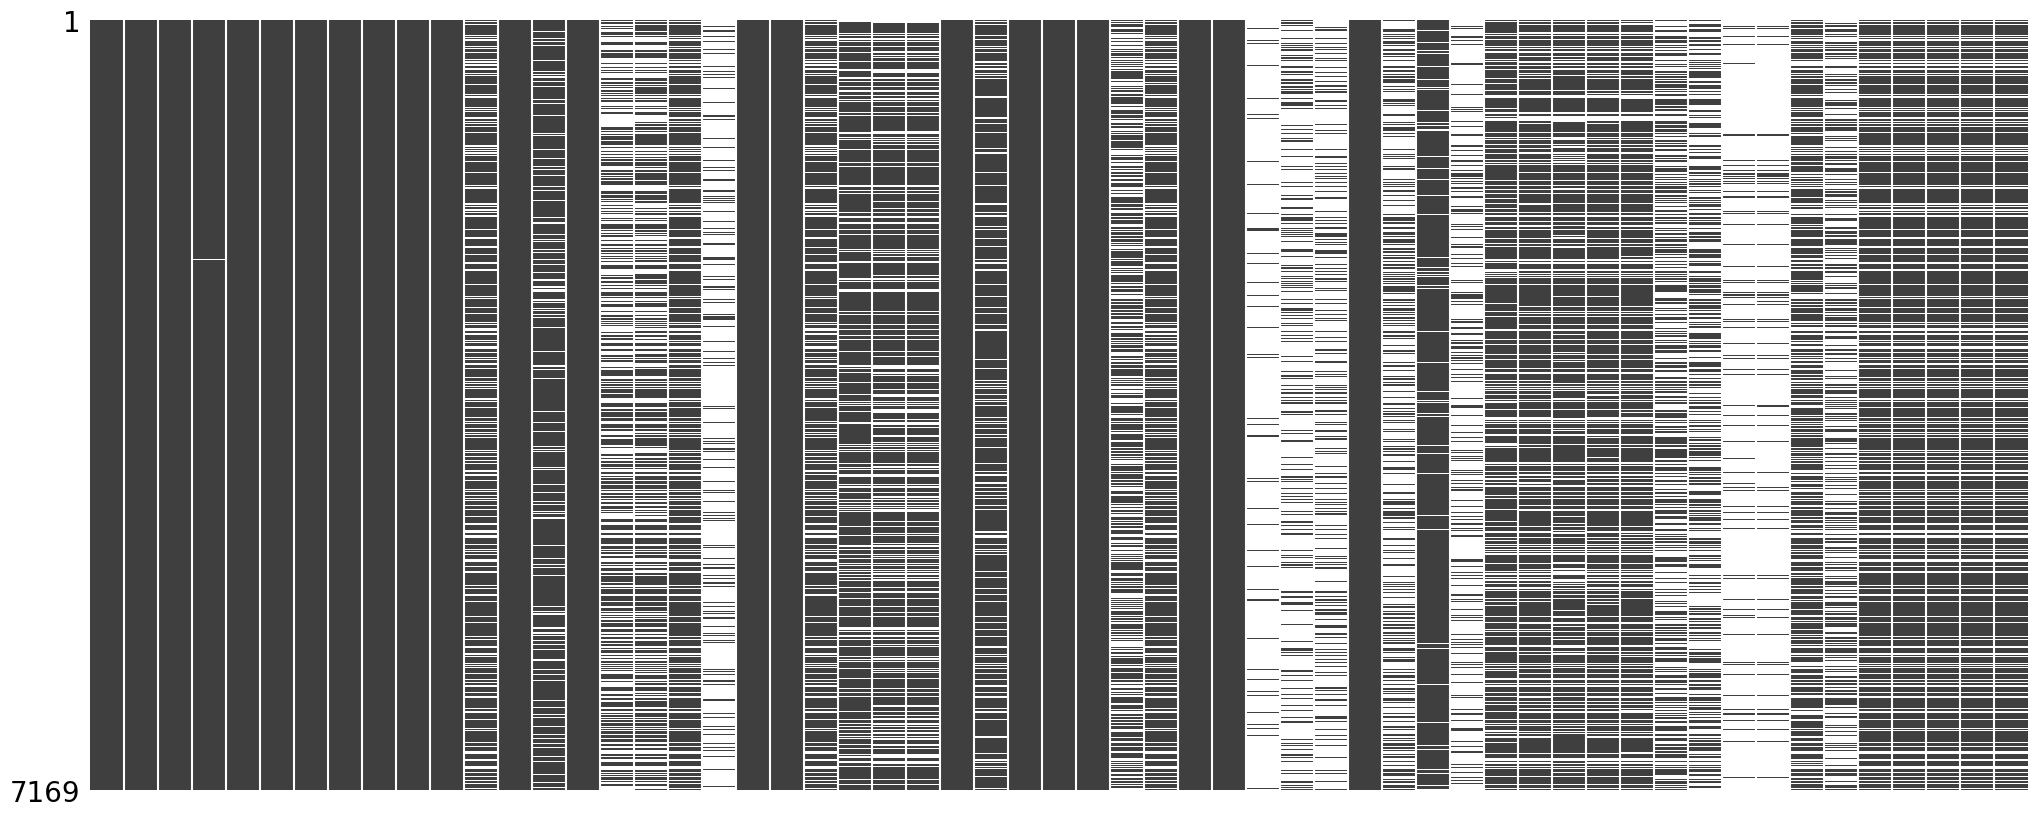

In [15]:
df_missing_percentage = (df_clean.isnull().sum().sum() / (df_clean.shape[0] * df_clean.shape[1])) * 100
print("df_clean missing percentage: {}".format(df_missing_percentage))

msno.matrix(df_clean, sparkline=False)
print("*************** {} ***************".format(df_clean.name))
print(df_clean.info())
print(describe_df(df_clean))

## **TRANSFORMED DATA FRAME**

------------------------------------------------
Transforming...


f:\U\pdg\CKD_Predictor\.env\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
f:\U\pdg\CKD_Predictor\.env\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
f:\U\pdg\CKD_Predictor\.env\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
f:\U\pdg\CKD_Predictor\.env\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
f:\U\pdg\CKD_Predictor\.env\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Grupo de Riesgo                                                       False
CodDepto                                                              False
FechaNovedadFallecido                                                 False
Edad                                                                   True
Cod_Género                                                            False
Tipo de Discapacidad                                                  False
Condición de Discapacidad                                             False
Pertenencia Étnica                                                    False
Coomorbilidad                                                         False
ADHERENCIA AL TRATAMIENTO                                             False
Fumador Activo                                                        False
CONSUMO DE ALCOHOL                                                     True
ENTREGA DE MEDICAMENTO OPORTUNA                                       False
FARMACOS ANT

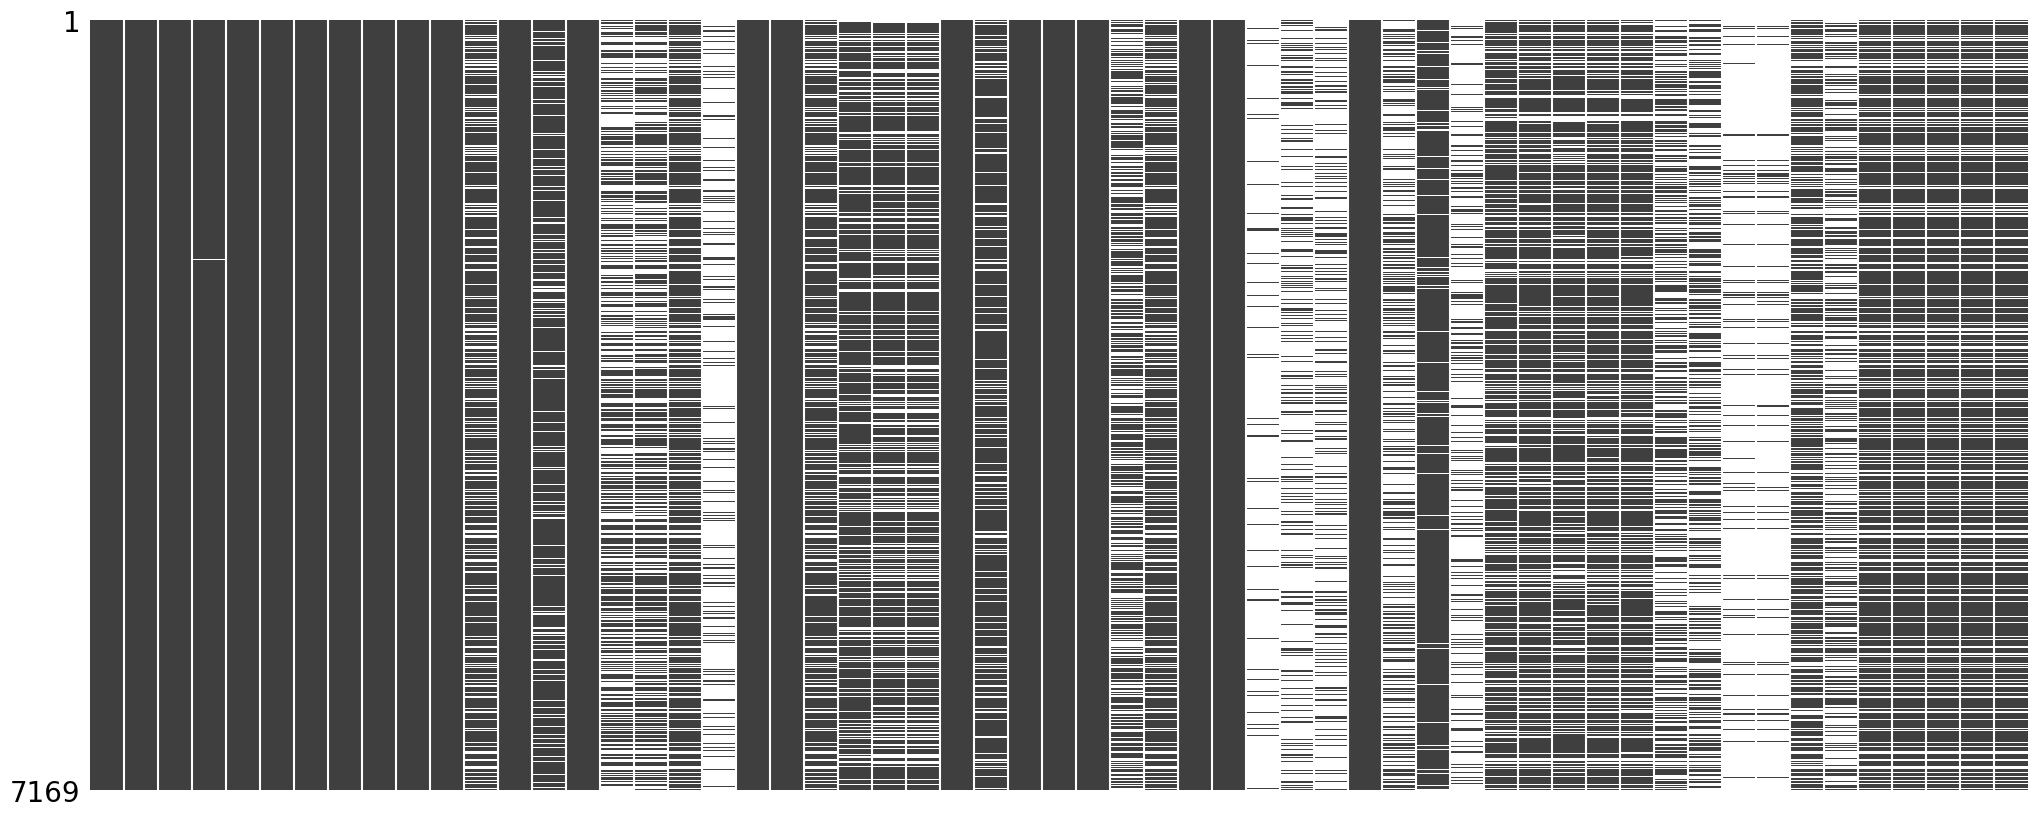

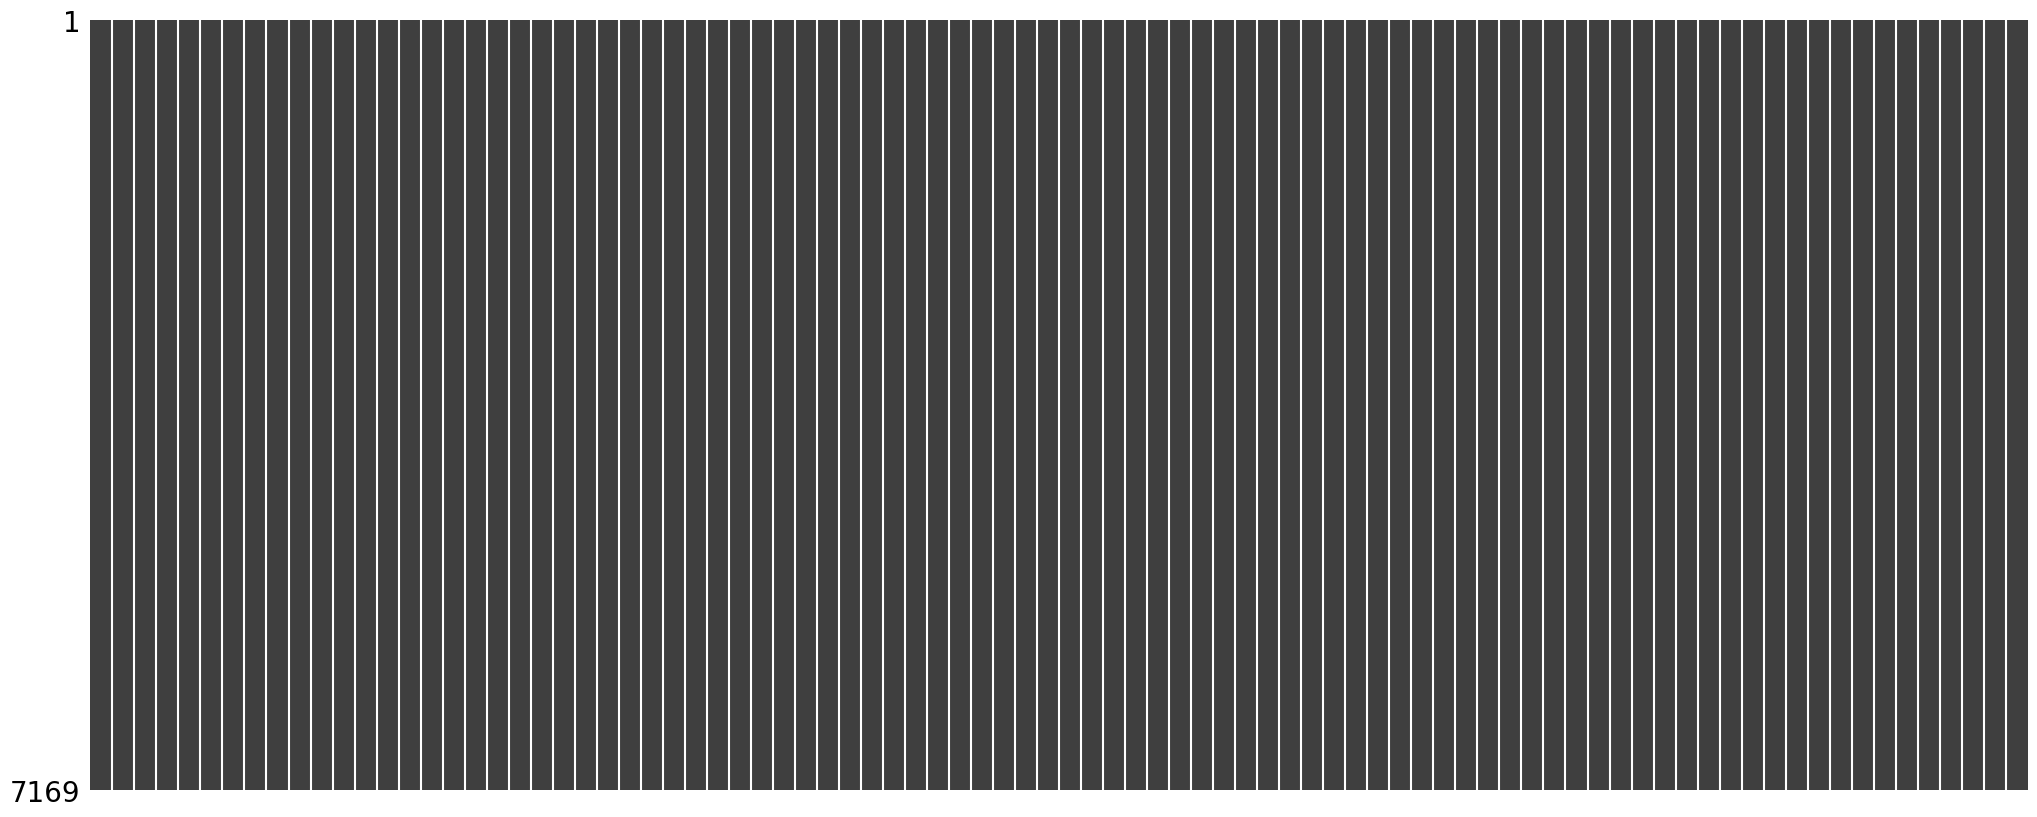

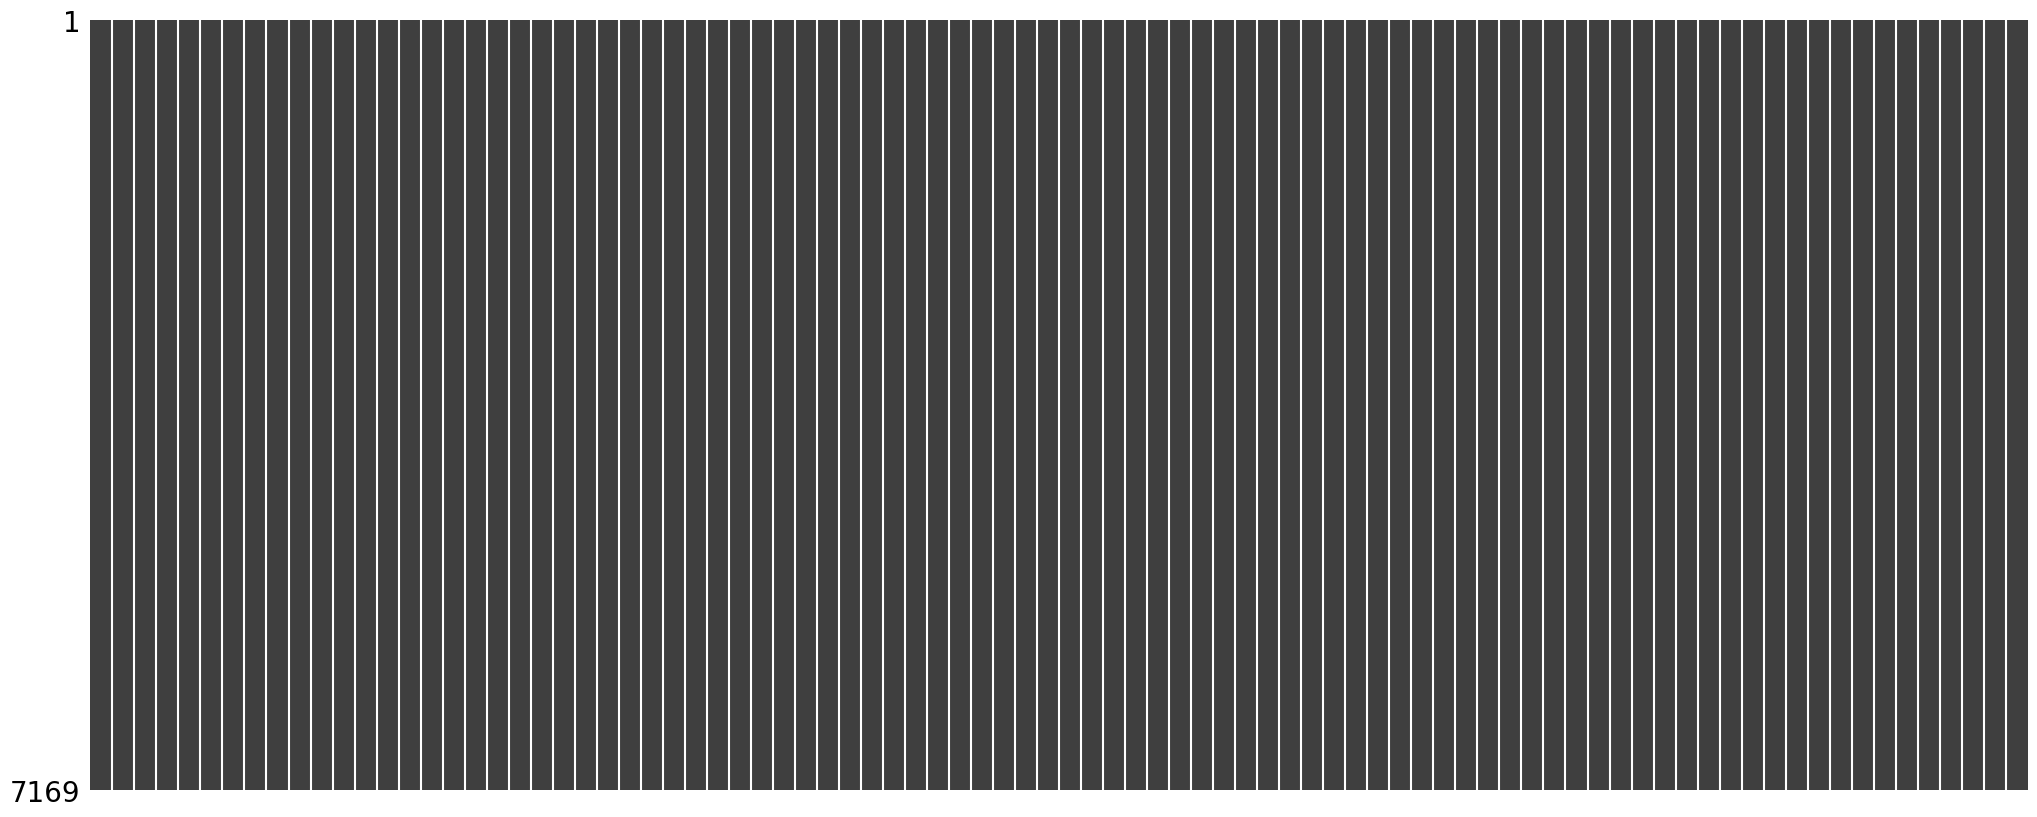

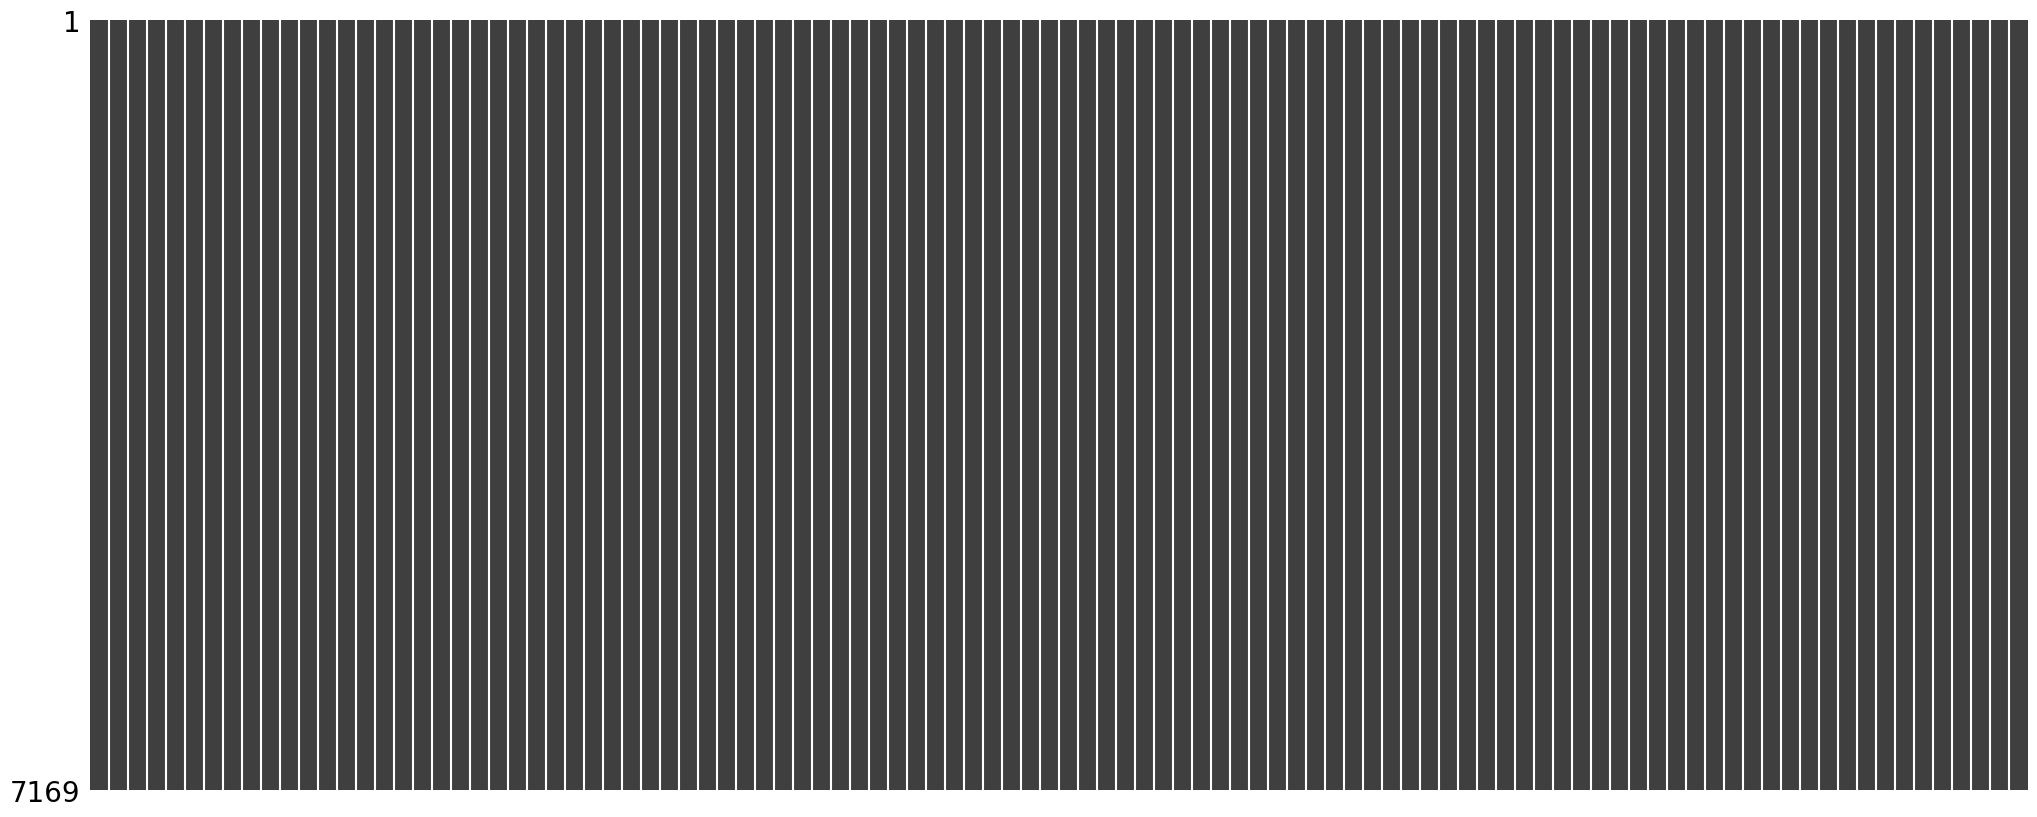

In [17]:
tr.run()
transformed_df = tr.get_df_transformed()
transformed_df.name = 'transformed df' 
X_train = tr.get_x_train_transformed()
X_train.name = 'X_train df' 
X_val = tr.get_x_val_transformed()
X_val.name = 'X_val df'
X_test = tr.get_x_test_transformed()
X_test.name = 'X_test df'
y_val = tr.get_y_val_transformed()
y_val.name = 'y_val df'
y_test = tr.get_y_test_transformed()
y_test.name = 'y_test df'
y_train = tr.get_y_train_transformed()
y_train.name = 'y_train df'


### **TRANSFORMED DF**

In [18]:
print(transformed_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7169 entries, 0 to 7168
Data columns (total 102 columns):
 #    Column                                                               Dtype  
---   ------                                                               -----  
 0    Grupo de Riesgo                                                      float64
 1    FechaNovedadFallecido                                                float64
 2    Edad                                                                 float64
 3    Cod_Género                                                           float64
 4    ADHERENCIA AL TRATAMIENTO                                            float64
 5    Fumador Activo                                                       float64
 6    CONSUMO DE ALCOHOL                                                   float64
 7    ENTREGA DE MEDICAMENTO OPORTUNA                                      float64
 8    ESTATINA                                                

### **Colums after fixing**

In [19]:
print_col_info(transformed_df,  list(transformed_df))


********************************************************************************
Column: Grupo de Riesgo
Unique values in Grupo de Riesgo column:
[0.]
Total Unique values:
1
Value counts for Grupo de Riesgo column:
0.0    7169
Name: Grupo de Riesgo, dtype: int64
Data type of Grupo de Riesgo column:
float64
********************************************************************************

********************************************************************************
Column: FechaNovedadFallecido
Unique values in FechaNovedadFallecido column:
[0.]
Total Unique values:
1
Value counts for FechaNovedadFallecido column:
0.0    7169
Name: FechaNovedadFallecido, dtype: int64
Data type of FechaNovedadFallecido column:
float64
********************************************************************************

********************************************************************************
Column: Edad
Unique values in Edad column:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 

*************** transformed df ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7169 entries, 0 to 7168
Columns: 102 entries, Grupo de Riesgo to OBESIDAD_SOBREPESO
dtypes: float64(42), int64(38), uint8(22)
memory usage: 4.5 MB
None
                                                     count         mean  \
Grupo de Riesgo                                     7169.0     0.000000   
FechaNovedadFallecido                               7169.0     0.000000   
Edad                                                7169.0    22.006138   
Cod_Género                                          7169.0     1.613754   
ADHERENCIA AL TRATAMIENTO                           7169.0     0.052588   
Fumador Activo                                      7169.0     0.008788   
CONSUMO DE ALCOHOL                                  7169.0     0.267820   
ENTREGA DE MEDICAMENTO OPORTUNA                     7169.0     0.290417   
ESTATINA                                            7169.0     1.192774   
P

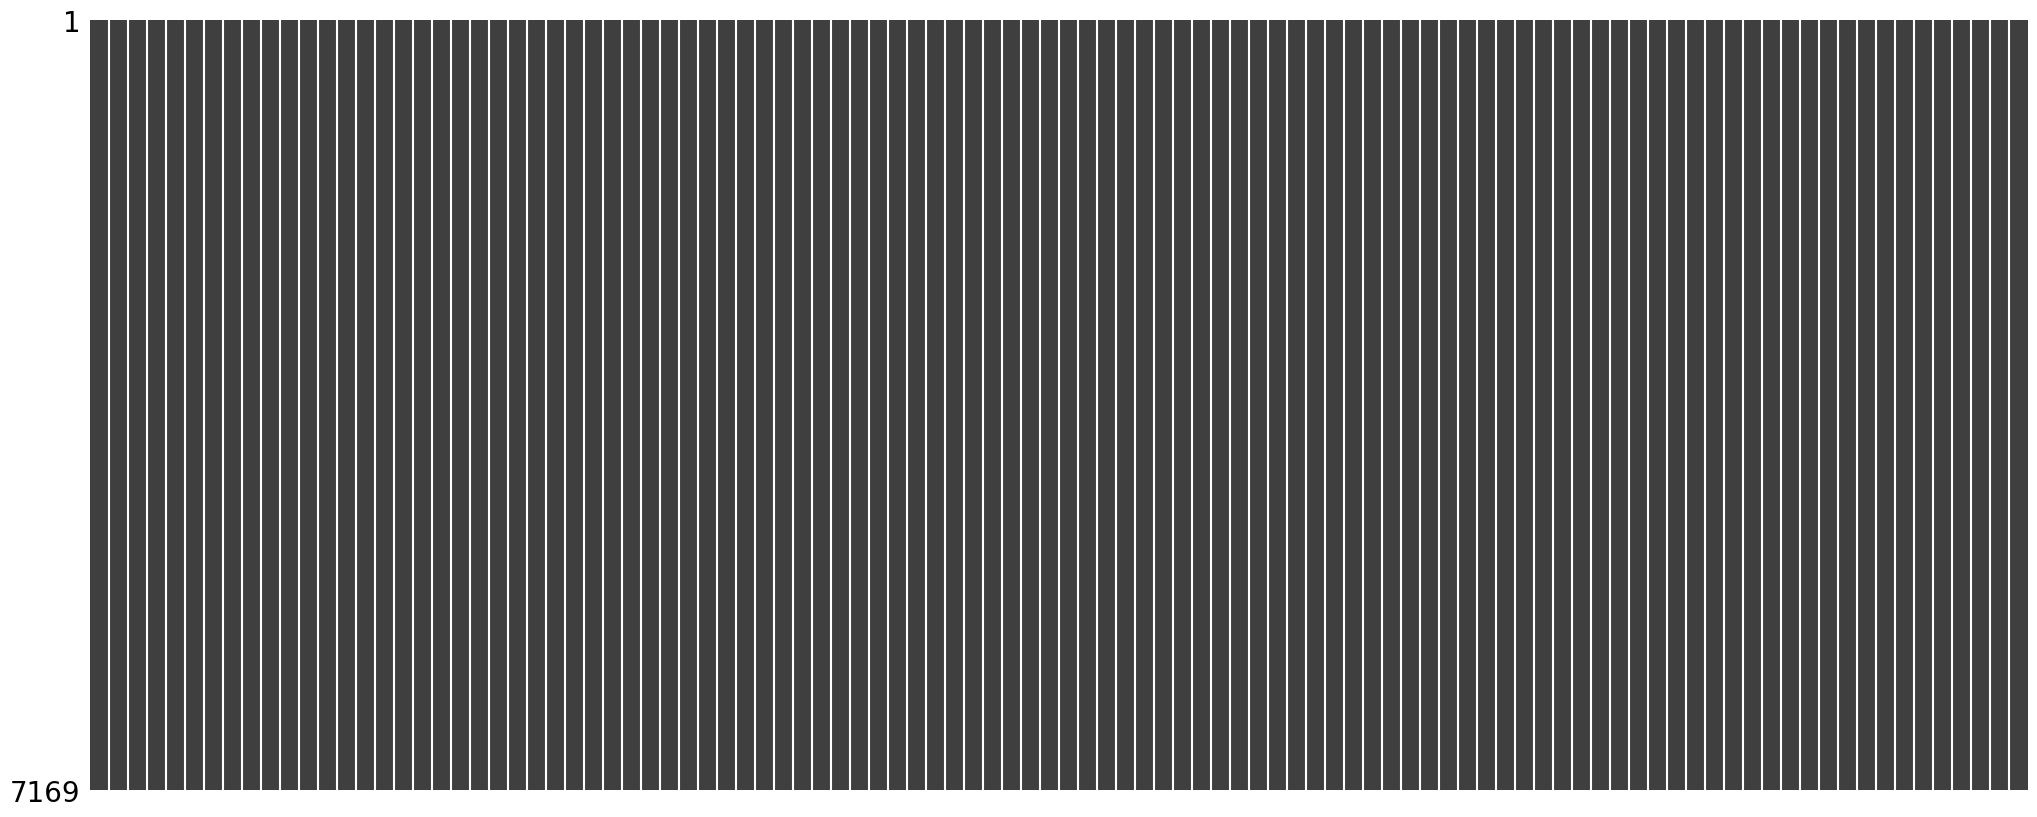

In [20]:
msno.matrix(transformed_df, sparkline=False)
print("*************** {} ***************".format(transformed_df.name))
print(transformed_df.info())
print(transformed_df.describe(include="all").T)

In [21]:
print("*************** {} ***************".format(X_train.name))
print(X_train.info())
print(X_train.describe(include="all").T)

*************** X_train df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4301 entries, 6936 to 1654
Columns: 101 entries, Grupo de Riesgo to OBESIDAD_SOBREPESO
dtypes: float64(41), int64(38), uint8(22)
memory usage: 2.7 MB
None
                                                     count         mean  \
Grupo de Riesgo                                     4301.0     0.000000   
FechaNovedadFallecido                               4301.0     0.000000   
Edad                                                4301.0    22.259940   
Cod_Género                                          4301.0     1.611253   
ADHERENCIA AL TRATAMIENTO                           4301.0     0.047431   
Fumador Activo                                      4301.0     0.008603   
CONSUMO DE ALCOHOL                                  4301.0     0.271332   
ENTREGA DE MEDICAMENTO OPORTUNA                     4301.0     0.289933   
ESTATINA                                            4301.0     1.190421   
PE

In [22]:
print("*************** {} ***************".format(X_val.name))
print(X_val.info())
print(X_val.describe(include="all").T)

*************** X_val df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 897 to 4428
Columns: 101 entries, Grupo de Riesgo to OBESIDAD_SOBREPESO
dtypes: float64(41), int64(38), uint8(22)
memory usage: 927.1 KB
None
                                                     count         mean  \
Grupo de Riesgo                                     1434.0     0.000000   
FechaNovedadFallecido                               1434.0     0.000000   
Edad                                                1434.0    21.287308   
Cod_Género                                          1434.0     1.613668   
ADHERENCIA AL TRATAMIENTO                           1434.0     0.068340   
Fumador Activo                                      1434.0     0.007671   
CONSUMO DE ALCOHOL                                  1434.0     0.257322   
ENTREGA DE MEDICAMENTO OPORTUNA                     1434.0     0.283821   
ESTATINA                                            1434.0     1.242678   
PES

In [23]:
print("*************** {} ***************".format(X_test.name))
print(X_test.info())
print(X_test.describe(include="all").T)

*************** X_test df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 6911 to 1706
Columns: 101 entries, Grupo de Riesgo to OBESIDAD_SOBREPESO
dtypes: float64(41), int64(38), uint8(22)
memory usage: 927.1 KB
None
                                                     count         mean  \
Grupo de Riesgo                                     1434.0     0.000000   
FechaNovedadFallecido                               1434.0     0.000000   
Edad                                                1434.0    21.963738   
Cod_Género                                          1434.0     1.621339   
ADHERENCIA AL TRATAMIENTO                           1434.0     0.052301   
Fumador Activo                                      1434.0     0.010460   
CONSUMO DE ALCOHOL                                  1434.0     0.267782   
ENTREGA DE MEDICAMENTO OPORTUNA                     1434.0     0.298466   
ESTATINA                                            1434.0     1.149930   
P

In [24]:
print("*************** {} ***************".format(y_train.name))
print(y_train.info())
print(y_train.describe(include="all").T)

*************** y_train df ***************
<class 'pandas.core.series.Series'>
Int64Index: 4301 entries, 6936 to 1654
Series name: y_train df
Non-Null Count  Dtype  
--------------  -----  
4301 non-null   float64
dtypes: float64(1)
memory usage: 67.2 KB
None
count    4301.000000
mean        1.447105
std         0.968962
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: y_train df, dtype: float64


In [25]:
print("*************** {} ***************".format(y_val.name))
print(y_val.info())
print(y_val.describe(include="all").T)

*************** y_val df ***************
<class 'pandas.core.series.Series'>
Int64Index: 1434 entries, 897 to 4428
Series name: y_val df
Non-Null Count  Dtype  
--------------  -----  
1434 non-null   float64
dtypes: float64(1)
memory usage: 22.4 KB
None
count    1434.000000
mean        1.453975
std         0.971133
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: y_val df, dtype: float64


In [26]:
print("*************** {} ***************".format(y_test.name))
print(y_test.info())
print(y_test.describe(include="all").T)

*************** y_test df ***************
<class 'pandas.core.series.Series'>
Int64Index: 1434 entries, 6911 to 1706
Series name: y_test df
Non-Null Count  Dtype  
--------------  -----  
1434 non-null   float64
dtypes: float64(1)
memory usage: 22.4 KB
None
count    1434.000000
mean        1.440725
std         0.987522
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: y_test df, dtype: float64


# **MODELS**

In [27]:
data_split_paths = {
    "X_train": '../../data/processed/transformed_data/X_train.csv',
    "X_test": '../../data/processed/transformed_data/X_test.csv',
    "y_train": '../../data/processed/transformed_data/y_train.csv',
    "y_test": '../../data/processed/transformed_data/y_test.csv'
}

## **XGB**

In [28]:
xgb_model = XGBModel(X_train, y_train, X_test, X_val, y_test, y_val)
pred, model = xgb_model.run()

print(pred)
print(model)

f:\U\pdg\CKD_Predictor\.env\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Accuracy score: 0.96


KeyboardInterrupt: 

In [ ]:
"""
 "********************************************heatmap of missingness********************************************"
    msno.matrix(df_clean);
    plt.title("heatmap of missingness")
    plt.show()
    
    print("****************************** Correlation matrix ******************************")
    def plot_correlation_matrix(df, graph_width):
        df = df.dropna('columns') # drop columns with NaN
        df = df[[col for col in df if df[col].nunique() > 1]]
        if df.shape[1] < 2:
            print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
            return
        corr = df.corr()
        plt.figure(num=None, figsize=(graph_width, graph_width), dpi=80, facecolor='w', edgecolor='k')
        corrMat = plt.matshow(corr, fignum=1)
        plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
        plt.yticks(range(len(corr.columns)), corr.columns)
        plt.gca().xaxis.tick_bottom()
        plt.colorbar(corrMat)
        plt.title(f'Correlation Matrix for ', fontsize=15)
        plt.tick_params(labelsize=10)
        plt.title('Correlation Matrix', fontsize=1)
        plt.show()
        print(corr)


    print(df_clean.corr())
    plot_correlation_matrix(df_clean, 100)
    
    '../../data/processed/cleaned_data/Cleaned_data.csv'
"""


'\n "********************************************heatmap of missingness********************************************"\n    msno.matrix(df_clean);\n    plt.title("heatmap of missingness")\n    plt.show()\n    \n    print("****************************** Correlation matrix ******************************")\n    def plot_correlation_matrix(df, graph_width):\n        df = df.dropna(\'columns\') # drop columns with NaN\n        df = df[[col for col in df if df[col].nunique() > 1]]\n        if df.shape[1] < 2:\n            print(f\'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2\')\n            return\n        corr = df.corr()\n        plt.figure(num=None, figsize=(graph_width, graph_width), dpi=80, facecolor=\'w\', edgecolor=\'k\')\n        corrMat = plt.matshow(corr, fignum=1)\n        plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)\n        plt.yticks(range(len(corr.columns)), corr.columns)\n        plt.gca().xaxis.tick_bot